# PA1: Naive Bayes


### Name: Muhammad Hashim Tariq
### Roll Number: 28100326


### Learning Outcomes

After this PA you can:

- Choose Naive Bayes variant based on feature type  
- Implement Naive Bayes in log-space  
- Design a Bag-of-Words (BoW) vectorizer  
- Evaluate models with macro metrics  
- Compare implementations with scikit-learn  

### Introduction

In this notebook, you will be implementing two types of Naive Bayes model based on the dataset features and task requirements.

For reference and additional details on these topics, please go through [Appendix B](https://web.stanford.edu/~jurafsky/slp3/) of the SLP3 book.

In this assignment, you are provided with two datasets. One is suitable for **Multinomial Naive Bayes**, while the other is appropriate for **Bernoulli Naive Bayes**. Your task is to:
1. Analyze both datasets and determine which Naive Bayes model to apply based on the dataset’s characteristics.
2. Implement both **Multinomial** and **Bernoulli Naive Bayes** from scratch, adhering to the guidelines below regarding allowed libraries.
3. Finally, apply the corresponding models using the `sklearn` library and compare the results with your own implementation.

### Import Policy Clarification

To keep the assignment consistent and fair, please follow these rules for imports:

- **From-scratch sections**:  
  - Allowed: `numpy`, `pandas`, and Python standard library (e.g., `import re`)  
  - Do **not** use `sklearn` or any other ML libraries.

- **Evaluation (anywhere in the notebook)**:  
  - Allowed: `sklearn.metrics` (e.g., `accuracy_score`, `precision_score`, `recall_score`, etc.)

- **Baselines section only**:  
  - Allowed: `sklearn.naive_bayes` (specifically `MultinomialNB` and `BernoulliNB`)  

**No additional imports** are permitted beyond the scope listed above.

### Instructions

- Follow along with the notebook, filling out the necessary code where instructed.

- <span style="color: red;">Make sure to run all cells for credit.</span>

- <span style="color: red;">Do not remove any pre-written code.</span>

- <span style="color: red;">Feel free to insert additional code cells.</span>

- <span style="color: red;">You must attempt all parts.</span>

All necessary libraries for this assignment have already been added. You are not allowed to add any additional imports.

In [1]:
# uncomment the following line if scikit-learn not installed already
# !pip install  scikit-learn --quiet

# !pip install numpy regex pandas --quiet
import numpy as np
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

### The Datasets

In this assignment, you are provided with two datasets:

- **Mushroom**: The dataset contains descriptions of over 8,000 mushrooms. Each mushroom is labeled as either edible (e) or poisonous (p), and the dateset includes 22 categorical features such as cap shape, color, odor, gill size, and habitat for each datapoint. Read more about the dataset [here](https://www.kaggle.com/datasets/uciml/mushroom-classification/data).   
- **AG-News**: The AG News dataset is a widely used benchmark for text classification, containing over 120,000 news articles grouped into four categories: World, Sports, Business, and Science/Technology. Each article consists of a short news title and description. Furthermore a test-train split has already been done for you. Read more about the dataset [here](https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset). In this assignment you will be using 20k articles for training and 5k articles for testing.

### Task [3 Marks]:
- Explore both datasets and identify their key features. This will help you determine which dataset is best suited for **Multinomial Naive Bayes** and which is better suited for **Bernoulli Naive Bayes**. 
- Load both Datasets (using pandas) and Print the first 5 rows


In [4]:
# Mushroom Dataset
mushroom_df = pd.read_csv(r".\mushrooms.csv")
mushroom_df.head()
# Code Here 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# AG-news Dataset
agnews_train_df = pd.read_csv(r".\AG-News\train.csv")
print("Training Data (AG-News):")
agnews_train_df.head()

Training Data (AG-News):


,Category,Title,Description
0,Business,"BBC set for major shake-up, claims newspaper","London - The British Broadcasting Corporation,..."
1,Business,Marsh averts cash crunch,Embattled insurance broker #39;s banks agree t...
2,Sports,"Jeter, Yankees Look to Take Control (AP)",AP - Derek Jeter turned a season that started ...
3,Sci/Tech,Flying the Sun to Safety,When the Genesis capsule comes back to Earth w...
4,Business,Stocks Seen Flat as Nortel and Oil Weigh,NEW YORK (Reuters) - U.S. stocks were set to ...


In [6]:
agnews_test_df = pd.read_csv(r".\AG-News\test.csv")
print("\nTesting Data (AG-News):")
agnews_test_df.head()


Testing Data (AG-News):


,Category,Title,Description
0,Sports,Fan v Fan: Manchester City-Tottenham Hotspur,"This weekend Manchester City entertain Spurs, ..."
1,World,Paris Tourists Search for Key to 'Da Vinci Cod...,Reuters - A funny thing happened on the way to...
2,Sci/Tech,Net firms: Don't tax VoIP,"The Spanish-American War is over and a ""tempor..."
3,Sci/Tech,Dependent species risk extinction,The global extinction crisis is worse than tho...
4,Sci/Tech,EDS Is Charter Member of Siebel BPO Alliance (...,NewsFactor - Siebel Systems (Nasdaq: SEBL) has...


##### Before proceeding with further tasks, ensure you have determined which type of Naive Bayes is most suitable for each dataset.

## 2. Data Preprocessing [10 Marks]

### 2.1 Preprocessing the Mushroom Dataset

In this task, you will first apply one-hot encoding to the categorical columns of the Mushroom dataset.
 After encoding, you will split the data into training and test sets using [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from `sklearn`. Make sure to set the parameter `test_size=0.3`, which means that 30% of the data will be used for testing and 70% for training. 

Tip: It is helpful to print the **shape of the dataset before splitting** and the **shapes of the training and test sets after splitting**. This will let you confirm that the split has been done correctly. 



In [ ]:
# Code Here 
mushroom_encoded_df = pd.get_dummies(mushroom_df, drop_first=False)

# print(mushroom_encoded_df.head())

# print("Original data frame shape: ", mushroom_df.shape)
# print("Encoded data frame shape: ", mushroom_encoded_df.shape)

mushroom_test, mushroom_train = train_test_split(mushroom_encoded_df, test_size=0.3, shuffle=True, random_state=10)

# print("Test frame shape: ", mushroom_test.shape)
# print("Train frame shape: ", mushroom_train.shape)

### 2.2 Preprocessing the AG-News Dataset

At this stage, you need to pre-process your data to ensure it's in a clean format for further analysis. The following steps should be performed:

- Remove any URL.
- Remove punctuation and non-alphanumeric characters.
- Convert all text to lowercase.
- Remove any extra whitespace.
- Eliminate common stopwords.

In the cell below, implement a function that carries out these tasks. You can use the `english_stopwords.txt` for removing stopwords.


Note: Stop words are very common words (such as *the, is, and, in, of*) that occur frequently in text but usually do not add much meaning for tasks like classification. Removing stop words helps reduce noise in the data and makes the model focus on the more informative words.

Once the function is complete, apply it to the `Description` column of your dataset to obtain the preprocessed text.

Tip: Use different variable names from the variables you used in 2.1 so they don't get overwritten 


In [7]:
def returnCleanDescription(data):
    stop_words = open(r'.\english_stopwords.txt', 'r')
    stop_words_text = stop_words.read()
    stop_words_lst = stop_words_text.split('\n')

    cleaned_description = list()
    i = 0
    for text in data:
        text = re.sub(r'http[a-zA-Z0-9\.\,\;\\\/]+', ' ', text)
        text = re.sub(r'[\;\,\!\-\\\/\|\?\>\<\"\'\,\:\(\)\.\#\$\&\*\^\@\!]+', ' ', text)
        text = re.sub(r'[\s]+', ' ', text)
        text = text.lower()
        text_list = [word for word in text.split() if word not in stop_words_lst]
        text = ' '.join(text_list)
        cleaned_description.append(text)
    
    return cleaned_description

agnews_train_df['Description'] = returnCleanDescription(agnews_train_df['Description'])
agnews_test_df['Description'] = returnCleanDescription(agnews_test_df['Description'])

Print the first 5 data samples


In [ ]:
# Code Here 
print("Training Data (AG-News):")
agnews_train_df.head()

In [ ]:
print("\nTesting Data (AG-News):")
agnews_test_df.head()

## 3. Implementing Naive Bayes from Scratch

## 3.1 Bernoulli Naive Bayes [25 Marks]

### From Scratch 

Recall that the Bernoulli Naive Bayes model is based on **Bayes' Theorem**:

$$
P(y \mid x) = \frac{P(x \mid y)P(y)}{P(x)}
$$

What we really want is to find the class \(c\) that maximizes $P(c \mid x)$, so we can use the following equation:

$$
\hat{c} = \underset{c}{\text{argmax}} \ P(c \mid x) = \underset{c}{\text{argmax}} \ P(x \mid c)P(c)
$$

In the case of **Bernoulli Naive Bayes**, we assume that each word \(x_i\) in a sentence follows a **Bernoulli distribution**, meaning that the word either appears (1) or does not appear (0) in the document. We can simplify the formula using this assumption:

$$
\hat{c} = \underset{c}{\text{argmax}} \ P(c) \prod_{i=1}^{n} P(x_i = 1 \mid c)^{x_i} P(x_i = 0 \mid c)^{1 - x_i}
$$

Where:

- $x_i = 1$ if the $i^{\text{th}}$ word is present in the document.
- $x_i = 0$ if the $i^{\text{th}}$ word is not present in the document.


We can estimate $P(c)$ by counting the number of times each class appears in our training data, and dividing by the total number of training examples. We can estimate $P(x_i = 1 \mid c)$ by counting the number of documents in class $c$ that contain the word $x_i$, and dividing by the total number of documents in class $c$.

### **Important: Laplace Smoothing**

When calculating $P(x_i = 1 \mid c)$ and $P(x_i = 0 \mid c)$, we apply **Laplace smoothing** to avoid zero probabilities. This is essential because, without it, any word that has not appeared in a document of class $c$ will have a probability of zero, which would make the overall product zero, leading to incorrect classification.

**Reason**: Laplace smoothing ensures that we don't encounter zero probabilities by adding a small constant (typically 1) to both the numerator and the denominator. This is particularly useful when a word has never appeared in the training data for a specific class.

The smoothed probability formula is:

$$
P(x_i = 1 \mid c) = \frac{\text{count of documents in class } c \text{ where } x_i = 1 + 1}{\text{total documents in class } c + 2}
$$

This ensures no word has a zero probability, even if it was unseen in the training data.

### Avoiding Underflow with Logarithms:

To avoid underflow errors due to multiplying small probabilities, we apply logarithms, which convert the product into a sum:

$$
\hat{c} = \underset{c}{\text{argmax}} \ \log P(c) + \sum_{i=1}^{n} \left[ x_i \log P(x_i = 1 \mid c) + (1 - x_i) \log P(x_i = 0 \mid c) \right]
$$

You will now implement this algorithm.

<span style="color: red;"> For this part, the only external library you will need is `numpy`. You are not allowed to use anything else.</span>


We have provided a **class definition** for `BernoulliNaiveBayes` below. Your task is to complete the methods so that the class can learn from training data and make predictions on new data.

### 1. `__init__`  
This method sets up the model.  
It creates empty containers that will later hold:  
- the probabilities of each class (class priors), and  
- the probabilities of features given each class.  

At this stage, no calculations are done — it’s just preparation.


### 2. `fit(X_train, y_train)`  
This method is where the model learns from the training data.  

It figures out:  
- how likely each class is overall, and  
- how likely each feature is to appear (or not) when the data belongs to a certain class.  

These probabilities are estimated from the training data, with a small adjustment (Laplace smoothing) so that unseen features don’t break the model.  

After this step, the model has all the information it needs for making predictions.

### 3. `predict(X_test)`  
This method uses the probabilities learned during training to classify new examples.  

For each new input, the model:  
- calculates how likely it is to belong to each possible class, and  
- chooses the class with the highest likelihood.  

This is how the model turns what it learned into actual predictions.
###  In Short  
- `__init__`: prepare storage for probabilities.  
- `fit`: learn probabilities from training data.  
- `predict`: apply those probabilities to classify new data.  

In [ ]:
class BernoulliNaiveBayes:
    def __init__(self):
        self.e_prior = 0
        self.p_prior = 0
        self.e_thetas = np.array([])
        self.p_thetas = np.array([])

    def fit(self, X_train, y_train):
        total_docs = len(y_train)
        total_e_docs = np.sum(y_train[:, 0])
        total_p_docs = np.sum(y_train[:, 1])

        self.e_prior = total_e_docs/total_docs
        self.p_prior = total_p_docs/total_docs

        self.e_thetas = (np.sum(X_train[y_train[:, 0]], axis=0) + 1) / (total_e_docs + 2)
        self.p_thetas = (np.sum(X_train[y_train[:, 1]], axis=0) + 1) / (total_p_docs + 2)
    
    def predict(self, X_test):
        e_score = np.array([])
        p_score = np.array([])
        e_score = np.log(self.e_prior) + np.sum((X_test * np.log(self.e_thetas)) + ((1 - X_test)*(np.log(1 - self.e_thetas))), axis=1)
        p_score = np.log(self.p_prior) + np.sum((X_test * np.log(self.p_thetas)) + ((1 - X_test)*(np.log(1 - self.p_thetas))), axis=1)
        f_score = np.where(e_score > p_score, "class_e", "class_p")
        return f_score

🔹 What you need to do:
1. **Train the model**  
   - Create an object of your `BernoulliNaiveBayes` class.  
   - Call the `.fit()` method on your training data (`X_train`, `y_train`).  

2. **Generate predictions**  
   - Use the `.predict()` method on your test data (`X_test`).  
   - Store the predicted labels in `y_pred`. 

In [ ]:
# Code here 
bn_model = BernoulliNaiveBayes()
bn_X_train = mushroom_train.iloc[:, 2:].values
bn_y_train = mushroom_train.iloc[:, 0:2].values
bn_model.fit(bn_X_train, bn_y_train)


In [ ]:
bn_X_test = mushroom_test.iloc[:, 2:].values
bn_y_pred = bn_model.predict(bn_X_test)
bn_y_test = mushroom_test.iloc[:, 0:2].values
bn_y_test = np.where(bn_y_test[:,0] == True, "class_e", "class_p")

**Evaluate the model**  
   -  the code to calculate evaluation metrics and display the confusion matrix has been provided to you.  
   - All you need to do is **replace the dummy variables** in the code with your actual ones:  
     - `y_test` → the true labels from your test set.  
     - `y_pred` → the labels predicted by your model.  
   - The code will then automatically compute **Accuracy**  **Precision**  **Recall**  **F1 Score**  and display the **Confusion Matrix**. 
###  Important:
For now, just remember:  
- **The higher these scores are, the better your model is performing.**  
- Each metric should be at least **86% or higher** on the validation data.  


In [ ]:
# Replace y_test,y_pred with ur test variables

accuracy = accuracy_score(bn_y_test, bn_y_pred)
precision = precision_score(bn_y_test, bn_y_pred, pos_label="class_p")
recall = recall_score(bn_y_test, bn_y_pred, pos_label="class_p")
f1 = f1_score(bn_y_test, bn_y_pred, pos_label="class_p")
matrix = confusion_matrix(bn_y_test, bn_y_pred)
matrix_display = ConfusionMatrixDisplay(matrix)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
matrix_display.plot()
print(matrix)

## 3.2 Multinomial Naive Bayes (Manual Implementation)

### Vectorizing sentences with Bag of Words [7 Marks]

Now that we have loaded in our data, we will need to vectorize our sentences - this is necessary to be able to numericalize our inputs before feeding them into our model. 

We will be using a Bag of Words approach to vectorize our sentences. This is a simple approach that counts the number of times each word appears in a sentence. 

The element at index $\text{i}$ of the vector will be the number of times the $\text{i}^{\text{th}}$ word in our vocabulary appears in the sentence. So, for example, if our vocabulary is `["the", "cat", "sat", "on", "mat"]`, and our sentence is `"the cat sat on the mat"`, then our vector will be `[2, 1, 1, 1, 1]`.

You will now create a `BagOfWords` class to vectorize our sentences. This will involve creating

1. A vocabulary from our corpus

2. A mapping from words to indices in our vocabulary

3. A function to vectorize a sentence in the fashion described above

It may help you to define something along the lines of a `fit` and a `vectorize` method.

- **`fit(sentences)`**: This method should look at all the sentences in your dataset (the *corpus*) and build the vocabulary. It also creates a mapping from each word to its index in the vocabulary.  

- **`vectorize(sentence)`**: This method takes a single sentence and converts it into a Bag of Words vector, using the vocabulary created in `fit`. Each position in the vector corresponds to a word in the vocabulary, and the value is the count of how many times that word appears in the sentence.

In [ ]:
class BagOfWords:
    def __init__(self):
        self.bag_of_words = dict()

    def fit(self, sentences):
        i = 0
        for sentence in sentences:
            words = sentence.split(' ')
            for word in words:
                if(word in self.bag_of_words):
                    pass
                else:
                    self.bag_of_words[word] = i
                    i += 1

    def vectorize(self, sentence):
        vector = np.zeros(len(self.bag_of_words))
        words = sentence.split(' ')
        for word in words:
            if(word in self.bag_of_words):
                vector[self.bag_of_words[word]] += 1
        return vector

For a sanity check, you can manually set the vocabulary of your `BagOfWords` object to the vocabulary of the example above, and check that the vectorization of the sentence is correct.

Once you have implemented the `BagOfWords` class, fit it to the training data, and vectorize the training,and test data.

In [ ]:
# Code Here 
bow = BagOfWords()
multi_training_data = agnews_train_df["Description"].values
bow.fit(multi_training_data)

In [ ]:
# Code Here 
vectors = list()
for sentence in agnews_train_df['Description']:
    vector = bow.vectorize(sentence)
    vectors.append(vector)
agnews_train_df['Description'] = vectors

In [ ]:
# Code Here 
vectors = list()
for sentence in agnews_test_df['Description']:
    vector = bow.vectorize(sentence)
    vectors.append(vector)
agnews_test_df['Description'] = vectors



### From Scratch [30 Marks]

Now that we have vectorized our sentences, we can implement our Naive Bayes model. Recall that the Naive Bayes model is based off of the Bayes Theorem:

$$
P(y \mid x) = \frac{P(x \mid y)P(y)}{P(x)}
$$

What we really want is to find the class $c$ that maximizes $P(c \mid x)$, so we can use the following equation:

$$
\hat{c} = \underset{c}{\text{argmax}} \ P(c \mid x) = \underset{c}{\text{argmax}} \ P(x \mid c)P(c)
$$

We can then use the Naive Bayes assumption to simplify this:

$$
\hat{c} = \underset{c}{\text{argmax}} \ P(c \mid x) = \underset{c}{\text{argmax}} \ P(c) \prod_{i=1}^{n} P(x_i \mid c)
$$

Where $x_i$ is the $i^{\text{th}}$ word in our sentence.

All of these probabilities can be estimated from our training data. We can estimate $P(c)$ by counting the number of times each class appears in our training data, and dividing by the total number of training examples. We can estimate $P(x_i \mid c)$ by counting the number of times the $i^{\text{th}}$ word in our vocabulary appears in sentences of class $c$, and dividing by the total number of words in sentences of class $c$.

It would help to apply logarithms to the above equation so that we translate the product into a sum, and avoid underflow errors. This will give us the following equation:

$$
\hat{c} = \underset{c}{\text{argmax}} \ \log P(c) + \sum_{i=1}^{n} \log P(x_i \mid c)
$$

You will now implement this algorithm. It would help to go through [Appendix B](https://web.stanford.edu/~jurafsky/slp3) to get a better understanding of the model - **it is recommended base your implementation off the pseudocode that has been provided**. You can either make a `NaiveBayes` class, or just implement the algorithm across two functions.

<span style="color: red;"> For this part, the only external library you will need is `numpy`. You are not allowed to use anything else.</span>

In [ ]:
class NaiveBayes:
    def __init__(self):
        self.priors_vector = np.array([])
        self.likelihood_vector = np.array([[],[],[],[]])
        pass

    def train(self, X_train, y_train):
        total_docs = len(y_train)
        # 2D vector whereby each row is a 1/0 vector for each class in the y_train in the following order Sports, World, Sci/Tech, Business
        classes_vector = np.array([
            np.where(y_train == "Sports", 1, 0), 
            np.where(y_train == "World", 1, 0), 
            np.where(y_train == "Sci/Tech", 1, 0), 
            np.where(y_train == "Business", 1, 0)
        ])
        # Calculating priors using the classes_vector
        self.priors_vector = np.sum(classes_vector, axis=1)
        self.priors_vector = self.priors_vector/total_docs
        # Now creating a 2D vector with 4 rows and n columns that will store the summation of feature vector sums for all rows in the description X_train for all classes respectively in the same order as that for classes_vector and priors
        feature_vector = np.array([
            np.sum(X_train[classes_vector[0,:] == 1], axis=0), 
            np.sum(X_train[classes_vector[1,:] == 1], axis=0), 
            np.sum(X_train[classes_vector[2,:] == 1], axis=0), 
            np.sum(X_train[classes_vector[3,:] == 1], axis=0)
        ])
        
        # Laplace smoothing

        feature_vector = feature_vector + int(1)

        # Now populating the likelihood vector using the feature vector by dividing each rows with the total number of words in that row

        divisors = np.sum(feature_vector, axis=1)
        divisors = divisors[:, np.newaxis]
        self.likelihood_vector = feature_vector/divisors

    def predict(self, X_test):
        posteriors_per_class = np.array([ # Sports, World, Sci/Tech, Business
        (np.log(self.priors_vector[0]) + np.sum((np.log(self.likelihood_vector[0]) * X_test), axis = 1)),
        (np.log(self.priors_vector[1]) + np.sum((np.log(self.likelihood_vector[1]) * X_test), axis = 1)),
        (np.log(self.priors_vector[2]) + np.sum((np.log(self.likelihood_vector[2]) * X_test), axis = 1)),
        (np.log(self.priors_vector[3]) + np.sum((np.log(self.likelihood_vector[3]) * X_test), axis = 1))
        ])

        class_pred_indexes = np.argmax(posteriors_per_class, axis=0)
        mapping = np.array(["Sports", "World", "Sci/Tech", "Business"])
        class_pred_names = np.array([mapping[i] for i in class_pred_indexes])
        return class_pred_names

In [ ]:
# Train the model
mn_model = NaiveBayes()
mn_X_train = np.stack(agnews_train_df["Description"].values)
mn_y_train = agnews_train_df["Category"].values
mn_model.train(mn_X_train, mn_y_train)

In [ ]:
mn_X_test = np.stack(agnews_test_df["Description"].values)
mn_y_test = agnews_test_df["Category"].values
mn_y_pred = mn_model.predict(mn_X_test)

Now use your implementation to train a Naive Bayes model on the training data, and generate predictions for the Validation Set.

Report the Accuracy, Precision, Recall, and F1 score of your model on the validation data. Also display the Confusion Matrix. You are allowed to use `sklearn.metrics` for this.

#### All of your metrics should have a score of 86% or more.

In [ ]:
# Replace y_test,y_pred with ur test variables
accuracy = accuracy_score(mn_y_test, mn_y_pred)
precision = precision_score(mn_y_test, mn_y_pred, average='macro')
recall = recall_score(mn_y_test, mn_y_pred, average='macro')
f1 = f1_score(mn_y_test, mn_y_pred, average='macro')
matrix = confusion_matrix(mn_y_test, mn_y_pred)
matrix_display = ConfusionMatrixDisplay(matrix)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
matrix_display.plot()

## 4. Implementing Naive Bayes using sklearn [15 Marks]

In this section, you will compare your manual implementation with **scikit-learn**'s (`sklearn`) implementation of the Naive Bayes models we covered above.

[Scikit-learn](https://scikit-learn.org/stable/) (also called `sklearn`) is one of the most widely used machine learning libraries in Python.  
It provides:
- **Pre-built, efficient model classes** that you can directly import and use without writing the low-level code yourself.
- Tools for **training**, **testing**, and **evaluating** models.  

In sklearn, most models follow the same basic pattern:
1. **Import the model** you want to use.  
2. **Create an object** of that model class.  
3. **Train the model** using the `.fit()` method (on your training data).  
4. **Make predictions** using the `.predict()` method (on your test data).  
5. **Evaluate performance** using metrics such as accuracy.  

For Naive Bayes, sklearn provides different variants depending on the type of data:
- [`BernoulliNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) – used when the features are binary
- [`MultinomialNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) – used when the features are discrete or represent counts.

**Your Task**  
1. Implement both `BernoulliNB` and `MultinomialNB` using sklearn on the same datasets you used for your manual implementation.  
2. Evaluate your models using the following metrics(code given-just replace the dummy variables):  
   - **Accuracy**  
   - **Precision**  
   - **Recall**  
   - **F1-score**  
   - **Confusion Matrix**  
3. Compare the performance of these sklearn models with your manual implementation.  

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [ ]:
#Code here for Multinomial
#-----------PLEASE RUN THIS IN ISOLATION FROM THE REST OF THE NOTEBOOK THE REASON BEING THAT THE CELL CONTAINS ALMOST THE ENTIRETY OF PREPROCESSING, AND VECTORIZING COUPLED WITH THE SK-LEARNS MULTINOMIAL TRAINING THAT TAKES ALOT OF MEMORY. THE REASON FOR WHY I DID THIS WAS TO PREVENT VARIABLES GETTING REFERENCED FROM ABOVE AND ENSURE THAT A APPLY THE SK-LEARNS ALGORITHMS ON CLEAR/FRESH DATA. HOWEVER, RESULTS WITH ALL THIS EFFORT AND WITHOUT WERE ALL THE SAME. It worked for me however with Run All (16 gigs of memory)---------#
sk_mn_model = MultinomialNB()

sk_agnews_train_df = pd.read_csv(r".\AG-News\train.csv")
sk_agnews_test_df = pd.read_csv(r".\AG-News\test.csv")
sk_agnews_train_df['Description'] = returnCleanDescription(sk_agnews_train_df['Description'])
sk_agnews_test_df['Description'] = returnCleanDescription(sk_agnews_test_df['Description'])

sk_bow = BagOfWords()
sk_multi_training_data = sk_agnews_train_df["Description"].values
sk_bow.fit(sk_multi_training_data)

sk_vectors = list()
for sentence in sk_agnews_train_df['Description']:
    vector = sk_bow.vectorize(sentence)
    sk_vectors.append(vector)
sk_agnews_train_df['Description'] = sk_vectors
sk_vectors = list()
for sentence in sk_agnews_test_df['Description']:
    vector = sk_bow.vectorize(sentence)
    sk_vectors.append(vector)
sk_agnews_test_df['Description'] = sk_vectors

sk_mn_X_train = np.stack(agnews_train_df["Description"].values)
sk_mn_y_train = agnews_train_df["Category"].values
sk_mn_X_test = np.stack(agnews_test_df["Description"].values)
sk_mn_y_test = agnews_test_df["Category"].values

sk_mn_model.fit(sk_mn_X_train, sk_mn_y_train)
sk_mn_y_pred = sk_mn_model.predict(sk_mn_X_test)

In [ ]:
accuracy = accuracy_score(sk_mn_y_test, sk_mn_y_pred)
precision = precision_score(sk_mn_y_test, sk_mn_y_pred, average='macro')
recall = recall_score(sk_mn_y_test, sk_mn_y_pred, average='macro')
f1 = f1_score(sk_mn_y_test, sk_mn_y_pred, average='macro')
matrix = confusion_matrix(sk_mn_y_test, sk_mn_y_pred)
matrix_display = ConfusionMatrixDisplay(matrix)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
matrix_display.plot()
print(matrix)

In [ ]:
# Code Here for Bernoulli
sk_bn_model = BernoulliNB()

sk_mushroom_df = pd.read_csv(r".\mushrooms.csv")
sk_mushroom_encoded_df = pd.get_dummies(sk_mushroom_df, drop_first=False)
sk_mushroom_test, sk_mushroom_train = train_test_split(sk_mushroom_encoded_df, test_size=0.3, shuffle=True, random_state=10)
sk_bn_X_train = sk_mushroom_train.iloc[:, 2:].values.astype(np.float16)
sk_bn_y_train = sk_mushroom_train.iloc[:, 0].values.astype(np.float16)
sk_bn_X_test = mushroom_test.iloc[:, 2:].values.astype(np.float16)
sk_bn_y_test = mushroom_test.iloc[:, 0].values.astype(np.float16)

sk_bn_model.fit(sk_bn_X_train, sk_bn_y_train)
sk_bn_y_pred = sk_bn_model.predict(sk_bn_X_test)

In [ ]:
accuracy = accuracy_score(sk_bn_y_test, sk_bn_y_pred)
precision = precision_score(sk_bn_y_test, sk_bn_y_pred)
recall = recall_score(sk_bn_y_test, sk_bn_y_pred)
f1 = f1_score(sk_bn_y_test, sk_bn_y_pred)
matrix = confusion_matrix(sk_bn_y_test, sk_bn_y_pred)
matrix_display = ConfusionMatrixDisplay(matrix)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
matrix_display.plot()
print(matrix)

## 5. Conclusion [5 Marks]

1. Explain the key factors you considered when determining which dataset is more suitable for **Multinomial Naive Bayes** and which is better suited for **Bernoulli Naive Bayes**.

Bernoulli Naive Bayes models binary feature occurrence, making it appropriate for datasets where features are either present or absent, whereas Multinomial Naive Bayes models feature counts, suitable for text or frequency-based data.
The mushroom data set (Bernoulli implementation) was one with a nature that required the Bernoulli naiive bayes implementation because its features were such that they were either present or absent. Although the features in the raw data set had a few finite values (not binary) that they could take, we catered to this problem by converting each feature to a one hot vector whereby each feature transformed into n features whereby n is the number of possible values that feature could take up. Doing this with the data set gave us a transformed data set that could best be modeled using bernoulli Naive Bayes since each feature had either a truth value or a false value for each feature vector (class). A single feature could not be present more than 1 times in the feature vector (class).
On the contrary, in the AG-News data set (Multinomial implementation), the data we were supposed to model was strings of sentences that contained words many of which got repeated many times. Hence, the likelihood of a particular word being in a class was correlated with the number of times it appeared in that class and not only its mere presence in the class. Hence, multinomial naiive bayes was more appropriate for this data set.
So the key features can be summarized in the following bulleted points:
1. Feature representation and the possible frequency of feature appearance in the data per class.
2. Bernoulli's assumption of binary independence and Multinomial's assumption of independence of individual frequencies
3. Data sparsity and dimentionality

## 6. Text Generation using Naive Bayes [5 marks]

 ### Shannon-Style Text Generation with Naive Bayes

So far, we have used **Multinomial Naive Bayes** as a *classifier*:  
- Given a text → predict the most likely **class**.  

But we can also flip the perspective:  
- Given a **class** → generate a sequence of words that "look like" that class.  

This idea goes back to **Claude Shannon (1948)**, who showed how to generate language-like sequences by **sampling symbols according to their probabilities**.  


### Shannon’s Algorithm (Simplified)

 
1. **Collect statistics**: estimate how often each symbol (word or character) appears.  
2. **Build probabilities**: compute the distribution of symbols.  
3. **Sample from the distribution**:  
   - At each step, randomly choose the next symbol according to its probability.  
   - More frequent symbols are more likely to appear, but rare ones can still show up.  
4. **Repeat** this process to generate longer sequences.  

The result may look like gibberish, but it reflects the *statistical flavor* of the original text.  

###  Connecting Shannon to Naive Bayes

- In our case, the "statistics" come from the **trained `MultinomialNB` model in scikit-learn**.  
- For each class, the model stores:  
  - `model.feature_log_prob_` → the probability of each word given that class.  
- By picking a class and sampling words from its probability distribution, we implement **Shannon’s idea of random generation**.  
- For example:  
  - Class = `"Sports"`  
  - High-probability words might be: `["team", "game", "season", "player"]`  
  - Generated text could be:  
    ```
    player game team season coach win team league
    ```  


###  Why is this important?

- It shows that even a simple classifier like Naive Bayes can be used *generatively*.  
- This connects the historical Shannon method to modern AI: both rely on sampling from probability distributions.  
- Advanced models (like GPT) use the same principle, but with much richer probability structures and long-range context.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def shannon_generate(model, vocab, label_idx, n_words=10):
    """
    Generate random words from a trained MultinomialNB for a given class.

    Parameters
    ----------
    model : MultinomialNB
        A trained Naive Bayes model from scikit-learn.
    vocab : list
        The vocabulary list (mapping feature indices back to words).
    label_idx : int
        Index of the class label we want to generate text for.
    n_words : int
        Number of words to sample.

    Returns
    -------
    sampled_words : list
        List of generated words.
    probs : np.array
        Probability distribution of words for the chosen class.
    """

    # === Step 1: Get log-probabilities of words for the chosen class ===
    log_probs = model.feature_log_prob_[label_idx]

    # === Step 2: Convert log-probabilities back to normal probabilities ===
    probs = np.exp(log_probs)

    # === Step 3: Normalize (just in case, ensures they sum to 1) ===
    probs /= probs.sum()

    # === Step 4: Randomly sample words according to their probabilities ===
    # np.random.choice picks indices with probability proportional to probs
    sampled_idx = np.random.choice(len(vocab), size=n_words, p=probs)

    # === Step 5: Map sampled indices back to actual words from the vocab ===
    sampled_words = [vocab[i] for i in sampled_idx]

    return sampled_words, probs

##  Generating Words from Each Class 

We’ve already given you the function `shannon_generate` (above).  
Your job is to use it to **generate 10 random words per class** from the trained Naive Bayes model.  


### Instructions:
1. Loop through all the classes of your model.  
2. For each class:
Call `shannon_generate(model, vocab, label_idx, n_words=10)`.  
Print the class name and the 10 generated words.  

In [ ]:
# Replace 'mnb' with your scikit-learn trained MultiNomial Naive Bayes
label_names = sk_mn_model.classes_
for index, name in enumerate(label_names):
    sampled_words, probs = shannon_generate(sk_mn_model, list(sk_bow.bag_of_words.keys()), index)
    print(f"Class-{name}: ", sampled_words)

# Code here


# 7. Bonus (Optional):
## Bi-gram Naive Bayes [15 Marks]

So far, we’ve worked with **unigrams** (single words).  
Now we’ll extend this idea to **bigrams** — pairs of consecutive words.

###  What is a Bigram?
- A **unigram** feature looks at individual words:  
  `["i", "love", "pizza"]`  
- A **bigram** feature looks at pairs of words:  
  `[("i","love"), ("love","pizza")]`  

Bigrams capture **local context** and word order. For example:
- `"not good"` has a very different meaning than `"good"`.  
- A unigram model might miss this, but a bigram model can capture it.

###  How does Bigram Naive Bayes work?
- We treat each **bigram** as a feature (instead of each single word).  
- For each class:
  - We count how often each bigram appears.  
  - We compute probabilities with **Laplace smoothing** (just like before).  
- At prediction time:
  - We break the test sentence into bigrams.  
  - We calculate scores for each class using those bigram probabilities.  
  - The class with the highest score is chosen.

###  Your Task
1. Implement a **`BigramNaiveBayes`** class.  
2. Train your model on the training data.  
3. Generate predictions on the test set.  
4. Evaluate your model using the **accuracy, precision, recall, F1, and confusion matrix** code you already have.

### Hint:
You can start by writing a helper function to turn a sentence into bigrams



In [37]:
bigram_agnews_train_df = pd.read_csv(r".\AG-News\train.csv")
bigram_agnews_test_df = pd.read_csv(r".\AG-News\test.csv")
bigram_agnews_train_df['Description'] = returnCleanDescription(bigram_agnews_train_df['Description'])
bigram_agnews_test_df['Description'] = returnCleanDescription(bigram_agnews_test_df['Description'])

In [38]:
class BagOfBigrams:
    def __init__(self):
        self.bag_of_bigrams = dict()

    def fit(self, sentences):
        i = 0
        for sentence in sentences:
            words = sentence.split(' ')
            for index in range(0, len(words) - 1) :
                bigram = " ".join([words[index], words[index + 1]])
                if(bigram in self.bag_of_bigrams):
                    pass
                else:
                    self.bag_of_bigrams[bigram] = i
                    i += 1

    def vectorize(self, sentence):
        vector = np.zeros(len(self.bag_of_bigrams), dtype=np.int16)
        words = sentence.split(' ')
        for index in range(0, len(words) - 1):
            bigram = " ".join([words[index], words[index + 1]])
            if(bigram in self.bag_of_bigrams):
                vector[self.bag_of_bigrams[bigram]] += 1
        return vector.astype(np.int8)

In [39]:
bob = BagOfBigrams()
bigram_training_data = bigram_agnews_train_df["Description"].values
bob.fit(bigram_training_data)

In [40]:
bigram_vectors_train = list()
for sentence in bigram_agnews_train_df['Description']:
    vector = bob.vectorize(sentence)
    bigram_vectors_train.append(vector)
bigram_agnews_train_df['Description'] = bigram_vectors_train

In [41]:
bigram_vectors_test = list()
for sentence in bigram_agnews_test_df['Description']:
    vector = bob.vectorize(sentence)
    bigram_vectors_test.append(vector)
bigram_agnews_test_df['Description'] = bigram_vectors_test

In [ ]:
class Bigram_NaiveBayes:
    def __init__(self):
        self.priors_vector = np.array([])
        self.likelihood_vector = np.array([[],[],[],[]])
        pass

    def train(self, X_train, y_train):
        total_docs = len(y_train)
        # 2D vector whereby each row is a 1/0 vector for each class in the y_train in the following order Sports, World, Sci/Tech, Business
        classes_vector = np.array([
            np.where(y_train == "Sports", 1, 0), 
            np.where(y_train == "World", 1, 0), 
            np.where(y_train == "Sci/Tech", 1, 0), 
            np.where(y_train == "Business", 1, 0)
        ])
        # Calculating priors using the classes_vector
        self.priors_vector = np.sum(classes_vector, axis=1)
        self.priors_vector = self.priors_vector/total_docs
        # Now creating a 2D vector with 4 rows and n columns that will store the summation of feature vector sums for all rows in the description X_train for all classes respectively in the same order as that for classes_vector and priors
        feature_vector = np.array([
            np.sum(X_train[classes_vector[0,:] == 1], axis=0), 
            np.sum(X_train[classes_vector[1,:] == 1], axis=0), 
            np.sum(X_train[classes_vector[2,:] == 1], axis=0), 
            np.sum(X_train[classes_vector[3,:] == 1], axis=0)
        ])
        
        # Laplace smoothing

        feature_vector = feature_vector + int(1)

        # Now populating the likelihood vector using the feature vector by dividing each rows with the total number of words in that row

        divisors = np.sum(feature_vector, axis=1)
        divisors = divisors[:, np.newaxis]
        self.likelihood_vector = feature_vector/divisors
        

    def predict(self, X_test):
        posteriors_per_class = np.array([ # Sports, World, Sci/Tech, Business
        (np.log(self.priors_vector[0]) + np.sum((np.log(self.likelihood_vector[0]) * X_test), axis = 1)),
        (np.log(self.priors_vector[1]) + np.sum((np.log(self.likelihood_vector[1]) * X_test), axis = 1)),
        (np.log(self.priors_vector[2]) + np.sum((np.log(self.likelihood_vector[2]) * X_test), axis = 1)),
        (np.log(self.priors_vector[3]) + np.sum((np.log(self.likelihood_vector[3]) * X_test), axis = 1))
        ])

        class_pred_indexes = np.argmax(posteriors_per_class, axis=0)
        mapping = np.array(["Sports", "World", "Sci/Tech", "Business"])
        class_pred_names = np.array([mapping[i] for i in class_pred_indexes])
        return class_pred_names

In [43]:
bigram_mn_model = Bigram_NaiveBayes()

In [ ]:
bigram_mn_X_train = bigram_agnews_train_df["Description"].values
bigram_mn_X_train = np.stack(bigram_mn_X_train)
bigram_mn_y_train = bigram_agnews_train_df["Category"].values

In [ ]:
#THE ERRORS ENCOUNTERED BELOW ARE DUE TO RAM INSUFFICIENCY.
#THE CODE WOULD WORK IF I SUBSTITUE dtype=np.16 with np.dtype=np.32 or np.dtype=np.64 provided there is sufficient ram

In [45]:
bigram_mn_model.train(bigram_mn_X_train, bigram_mn_y_train)

In [ ]:
bigram_mn_X_test = np.stack(bigram_agnews_test_df["Description"].values)
bigram_mn_y_test = bigram_agnews_test_df["Category"].values

In [48]:
bigram_mn_y_pred = bigram_mn_model.predict(bigram_mn_X_test)

C:\Users\hashi\AppData\Local\Temp\ipykernel_22544\914639477.py:42: RuntimeWarning: divide by zero encountered in log
  (np.log(self.priors_vector[0]) + np.sum((np.log(self.likelihood_vector[0]) * X_test), axis = 1, dtype=np.int64)),
C:\Users\hashi\AppData\Local\Temp\ipykernel_22544\914639477.py:43: RuntimeWarning: divide by zero encountered in log
  (np.log(self.priors_vector[1]) + np.sum((np.log(self.likelihood_vector[1]) * X_test), axis = 1, dtype=np.int64)),
C:\Users\hashi\AppData\Local\Temp\ipykernel_22544\914639477.py:43: RuntimeWarning: invalid value encountered in log
  (np.log(self.priors_vector[1]) + np.sum((np.log(self.likelihood_vector[1]) * X_test), axis = 1, dtype=np.int64)),
c:\Users\hashi\anaconda3\envs\pa0-env\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hashi\AppData\Local\Temp\ipykernel_22544\914639477.py:44: RuntimeWarning: divide by zero encoun

c:\Users\hashi\anaconda3\envs\pa0-env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Accuracy: 0.2482
Precision: 0.06205
Recall: 0.25
F1 Score: 0.099423169363884
Confusion Matrix:
[[   0    0 1238    0]
 [   0    0 1260    0]
 [   0    0 1241    0]
 [   0    0 1261    0]]


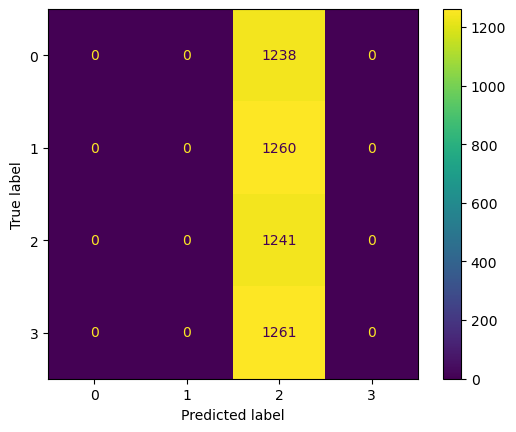

In [18]:
accuracy = accuracy_score(bigram_mn_y_test, bigram_mn_y_pred)
precision = precision_score(bigram_mn_y_test, bigram_mn_y_pred, average='macro')
recall = recall_score(bigram_mn_y_test, bigram_mn_y_pred, average='macro')
f1 = f1_score(bigram_mn_y_test, bigram_mn_y_pred, average='macro')
matrix = confusion_matrix(bigram_mn_y_test, bigram_mn_y_pred)
matrix_display = ConfusionMatrixDisplay(matrix)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
matrix_display.plot()
print(matrix)

# Fin.
